In [66]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [67]:
import theano
import theano.tensor as T

In [3]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

In [4]:
type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [5]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')

In [6]:
x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

In [7]:
z1 = x1 + y1

In [8]:
type(z1)

theano.tensor.var.TensorVariable

In [9]:
u1 = T.exp(z1)

In [10]:
type(u1)

theano.tensor.var.TensorVariable

In [11]:
z2 = T.dot(x2, y2)

In [12]:
z3 = T.sum(x3) + T.mean(y3)

In [13]:
theano.printing.pprint(x1)

'x1'

In [14]:
theano.printing.pprint(y1)

'y1'

In [15]:
theano.printing.pprint(z1)

'(x1 + y1)'

In [16]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [17]:
from IPython.display import SVG

In [20]:
%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

Wall time: 11.1 s


In [21]:
f1(1, 2)

array(3.)

In [22]:
f2 = theano.function([x2, y2], z2)
f2([1, 2], [3, 4])

array(11.)

In [23]:
f3 = theano.function([x3, y3], z3)
f3([[1], [2]], [[3], [4]])

array(6.5)

In [25]:
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
logistic(1)

array(0.73105858)

In [26]:
s2 = 1 / (1 + T.exp(-x2))
logistic2 = theano.function([x2], s2)
logistic2([0, 1])

array([0.5       , 0.73105858])

In [27]:
x1, y1 = T.dscalars('x1', 'y1')
z1 = x1 + y1
f1 = theano.function([x1, theano.In(y1, value=2)], z1)
f1(1)

array(3.)

In [28]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform()
f_rv_u = theano.function([], rv_u)

In [29]:
f_rv_u(), f_rv_u(), f_rv_u(), f_rv_u()

(array(0.48604732), array(0.68571232), array(0.98557605), array(0.19559641))

In [30]:
x = T.dscalar('x')
y = x
w = theano.shared(0.0, name="w")
update = theano.function([x], y, updates=[(w, w + x)])

In [31]:
w.set_value(f_rv_u())
w.get_value()

array(0.58341167)

In [32]:
update(1)
w.get_value()

array(1.58341167)

In [33]:
update(2)
w.get_value()

array(3.58341167)

In [34]:
update(1)
w.get_value()

array(4.58341167)

In [36]:
x1 = T.dvector('x1')
y1 = x1 ** 10
f1 = theano.function([x1], y1)

In [37]:
x1 = T.dscalar('x1')
y1 = x1 ** 2
gy1 = T.grad(y1, x1)
fy1 = theano.function([x1], y1)
fgy1 = theano.function([x1], gy1)

In [38]:
x1 = T.dscalar('x1')
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
gs1 = T.grad(s1, x1)
dlogistic = theano.function([x1], gs1)

In [40]:
%matplotlib inline

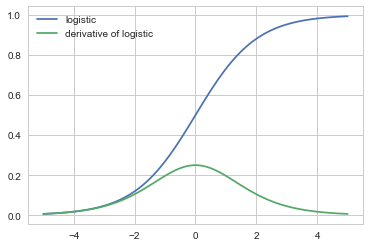

In [41]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label="logistic")
plt.plot(xx, y2, label="derivative of logistic")
plt.legend(loc=0)
plt.show()

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()

In [69]:
idx = np.in1d(iris.target, [0, 2])

In [70]:
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

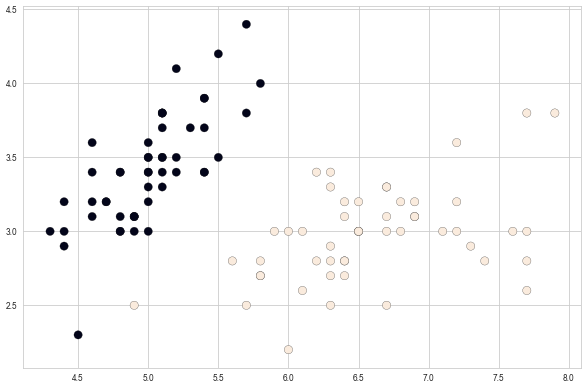

In [77]:
idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx]*(1/2)  # y=-1 또는 y=1

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [78]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
a = T.dot(X,w)+b
h = 1/(1+T.exp(-a))
z = h
cost = T.sum((y-z)**2)

In [79]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-2
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [80]:
for i in range(1000):
    cost_i = train(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.9683287358724
  10:  41.28173328427842
  20:  42.59328272010512
  30:  29.292085836905006
  40:  11.80600774849326
  50:  20.639036739696422
  60:  19.23711502765396
  70:  4.986372177300399
  80:  2.0759575762981326
  90:  2.0182557641655063
 100:  1.965803343336198
 110:  1.9178858013754654
 120:  1.8739170002245205
 130:  1.8334089162765854
 140:  1.7959518054214887
 150:  1.7611990099981962
 160:  1.7288551851488732
 170:  1.6986670771772123
 180:  1.67041622954284
 190:  1.6439131610696727
 200:  1.6189926800938936
 210:  1.5955100834313283
 220:  1.5733380506559498
 230:  1.5523640892738495
 240:  1.5324884197327318
 250:  1.5136222141276947
 260:  1.4956861212570307
 270:  1.4786090249788335
 280:  1.4623269937845922
 290:  1.4467823879823158
 300:  1.4319230974817905
 310:  1.4177018883487895
 320:  1.4040758403788223
 330:  1.3910058611833573
 340:  1.378456264871421
 350:  1.3663944054897974
 360:  1.3547903570645738
 370:  1.3436166334502775
 380:  1.33284794230436

In [83]:
y_pred = T.round(z) # 0 또는 1 
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])